<a href="https://colab.research.google.com/github/Andy7204/ML-Model-Implementation/blob/main/ML_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


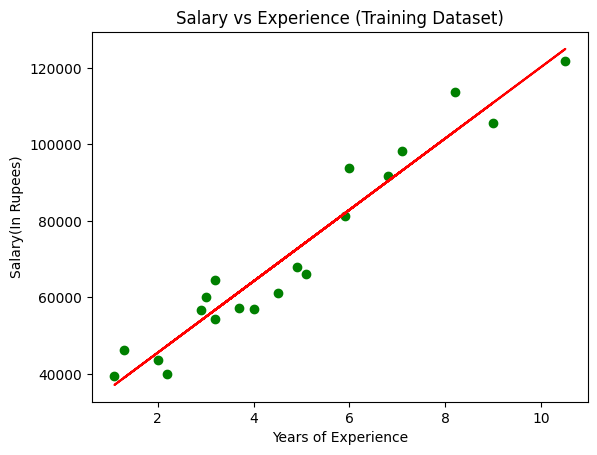

In [29]:
#Implement a linear regression model
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

income_data = pd.read_csv('/content/drive/MyDrive/Codes/Salary_Data.csv')
income_data.info()

X = income_data[['YearsExperience']]
y = income_data['Salary']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size =1/3, random_state = 0)

model = LinearRegression()
model.fit(train_X, train_y)

y_test_pred = model.predict(test_X)
y_train_pred = model.predict(train_X)

mtp.scatter(train_X, train_y, color="green")   
mtp.plot(train_X, y_train_pred, color="red")    
mtp.title("Salary vs Experience (Training Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show()  

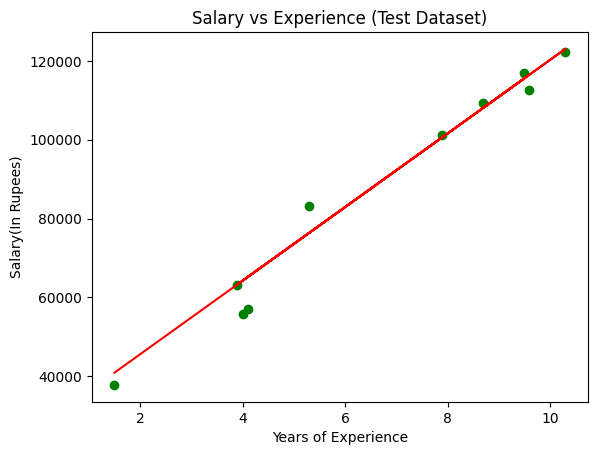

In [30]:

mtp.scatter(test_X, test_y, color="green")   
mtp.plot(test_X, y_test_pred, color="red")    
mtp.title("Salary vs Experience (Test Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show() 

In [43]:
#Implementing Logistics Regression
#import libraries
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#preprocessing
car_data = pd.read_csv('/content/drive/MyDrive/Codes/car_data.csv')
car_data.info()
X = car_data[['Age', 'AnnualSalary']]
y = car_data['Purchased']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state= 0)

#feature scaling
st_X = StandardScaler()
train_X = st_X.fit_transform(train_X)
test_X = st_X.fit_transform(test_X)

#prediction
log_model = LogisticRegression(random_state=0)
log_model.fit(train_X, train_y)
y_pred = log_model.predict(test_X)

#confusion matrix
cm = confusion_matrix(test_y, y_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Actual Positive', 'Actual Negative']
cm.index = ['Predicted Positive','Predicted Negative']
print()
print(cm)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB

                    Actual Positive  Actual Negative
Predicted Positive              135               17
Predicted Negative               19               79


In [62]:
#Implementing RandomoforestRegressor
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

#pre-processing
carprice_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
carprice_data.head()
X = carprice_data[['housing_median_age', 'total_rooms','total_bedrooms','population','median_income']]
y = carprice_data['median_house_value']
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_X = test_data[['housing_median_age', 'total_rooms','total_bedrooms','population','median_income']]
test_y = test_data['median_house_value']
rf_model = RandomForestRegressor(max_features ='sqrt' )
rf_model.fit(train_X,train_y)

#finding best tree size
def get_mae(max_leaf_nodes,train_X, test_X, train_y, test_y):
  new_model = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, random_state=0)
  new_model.fit(X,y)
  preds_val = new_model.predict(test_X)
  mae =mean_absolute_error(test_y, preds_val)
  return(mae)

house_max_leaf_nodes = [500,750,1000,1200,1500]
new_mae = {leaf_size:get_mae(leaf_size, X, test_X, y, test_y) for leaf_size in house_max_leaf_nodes}
best_tree_size = min(new_mae, key =new_mae.get)
print("MAE: ",new_mae )
print("Best tree size: ", best_tree_size)

#final model with best tree size
final_model = RandomForestRegressor(max_leaf_nodes= best_tree_size, random_state=0)
final_model.fit(X,y)
new_pred = final_model.predict(test_X)
final_mae =mean_absolute_error(test_y, new_pred)
print("Final MAE: ", final_mae)



MAE:  {500: 48940.10630855146, 750: 48727.71436799125, 1000: 48658.40413248771, 1200: 48632.548123190274, 1500: 48679.831475657425}
Best tree size:  1200
Final MAE:  48632.548123190274
